In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import Config
from src.data_processing import DataDict, ItemDict
import json

In [2]:
# diretório dos dados
data_dirs = Config.get_path_dir_data()
# caminho para o arquivo csv da variáveis e suas categorias
path_dict = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]

# caminho para os microdados do enem 2023
path_microdados = data_dirs["DADOS"]["MICRODADOS_ENEM_2023.csv"]
# caminho para os itens das provas
path_itens = data_dirs["DADOS"]["ITENS_PROVA_2023.csv"]

# Caminho para o dicionário de variveis dos microdados
path_dict_microdados = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]
# Caminho para o dicionário de variveis dos microdados
path_dict_itens = data_dirs["DICIONÁRIO"]["ITENS_PROVA_2023.csv"]

In [3]:
path_dir_parquet = data_dirs["DADOS"]["MICRODADOS_ENEM_2023_parquet"]
dict_files_path = path_dir_parquet.list_file()

In [4]:
dict_microdados = DataDict(path_dict_microdados)
dict_itens = ItemDict(path_dict_itens)

In [5]:
df_microdado_0 = pd.read_parquet(dict_files_path["part_0.parquet"])
df_microdado_1 = pd.read_parquet(dict_files_path["part_1.parquet"])

In [6]:
df_concat = pd.concat([df_microdado_0, df_microdado_1], ignore_index=1)
del df_microdado_1
del df_microdado_0

In [7]:
df_filtered = df_concat[df_concat["NO_MUNICIPIO_ESC"].notna() & df_concat["NO_MUNICIPIO_PROVA"].notna()]

engual = df_filtered[df_filtered["NO_MUNICIPIO_ESC"] == df_filtered["NO_MUNICIPIO_PROVA"]]
dif = df_filtered[df_filtered["NO_MUNICIPIO_ESC"] != df_filtered["NO_MUNICIPIO_PROVA"]]

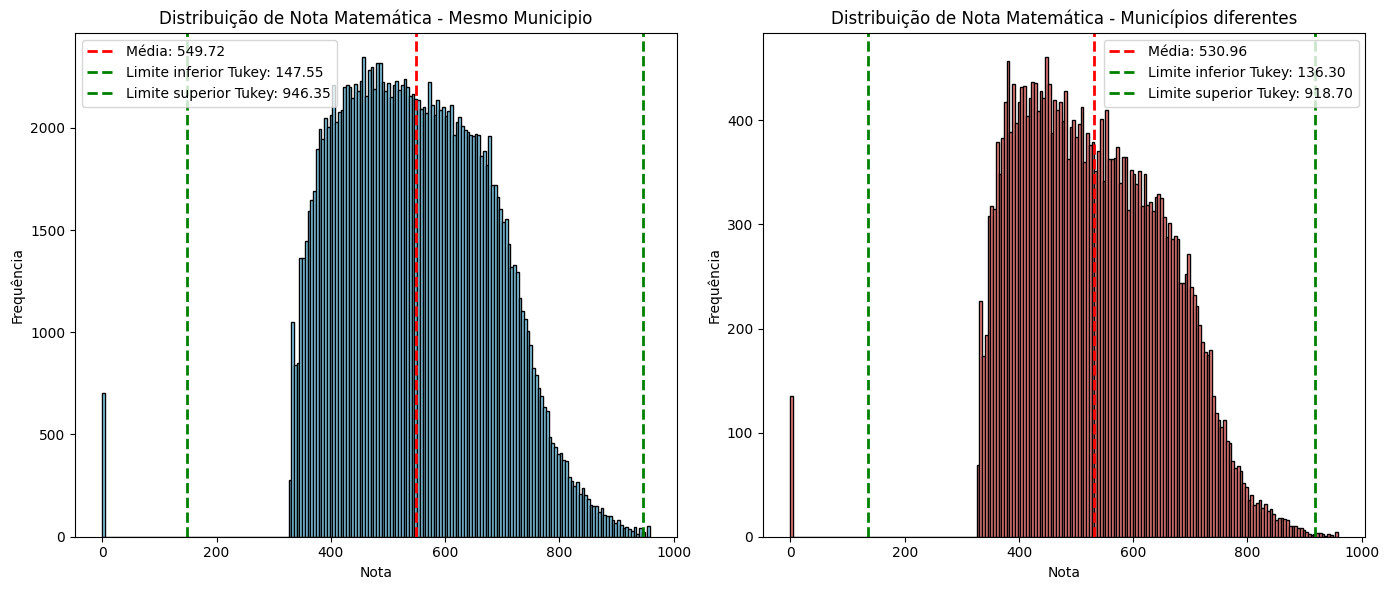

: 

In [ ]:
nota_mat_engual = engual["NU_NOTA_MT"]
nota_mat_dif = dif["NU_NOTA_MT"]

def tukey_limits(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    mean_value = np.mean(data)
    return lower_limit, upper_limit, mean_value

# Calculando limites de Tukey e médias
lower_limit_engual, upper_limit_engual, mean_engual = tukey_limits(nota_mat_engual)
lower_limit_dif, upper_limit_dif, mean_dif = tukey_limits(nota_mat_dif)

# Criando a grid 1x2 de gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].hist(nota_mat_engual, bins=200, edgecolor='black', color='skyblue')
axes[0].axvline(mean_engual, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_engual:.2f}')
axes[0].axvline(lower_limit_engual, color='green', linestyle='dashed', linewidth=2, label=f'Limite inferior Tukey: {lower_limit_engual:.2f}')
axes[0].axvline(upper_limit_engual, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior Tukey: {upper_limit_engual:.2f}')
axes[0].set_title('Distribuição de Nota Matemática - Mesmo Municipio')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frequência')
axes[0].legend()


axes[1].hist(nota_mat_dif, bins=200, edgecolor='black', color='lightcoral')
axes[1].axvline(mean_dif, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_dif:.2f}')
axes[1].axvline(lower_limit_dif, color='green', linestyle='dashed', linewidth=2, label=f'Limite inferior Tukey: {lower_limit_dif:.2f}')
axes[1].axvline(upper_limit_dif, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior Tukey: {upper_limit_dif:.2f}')
axes[1].set_title('Distribuição de Nota Matemática - Municípios diferentes')
axes[1].set_xlabel('Nota')
axes[1].set_ylabel('Frequência')
axes[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()